In [203]:
import numpy as np
import matplotlib.pyplot as plt


In [362]:
class reward_function:

  def __init__(self, params , noise = 0.001):
    self.current = 0
    if params[0] == 'sin':
      height = params[2]
      shift = params[1]
      indexes = np.arange(shift,5000*np.pi,0.1)
      y = height + np.sin(indexes)
    if params[0] == 'linear':
      intercept = params[1]
      gradient = params[2]
      x = np.arange(0.1,20000,0.1)
      y = gradient * x + intercept
    self.rewards = y
    self.noise = noise

  def sample(self):
    obs = self.rewards[self.current] + np.random.normal(0, self.noise, 1)[0]
    self.current += 1
    return obs

class Agent:

  def __init__(self, arms , data_confs ,noise):
    self.rewards = [reward_function(x,noise = noise) for x in data_confs]
    self.collected_rewards = {i : [0] for i in range(arms)}
    self.collected_rewards_cumm = [0]

    self.value_estimates = [0 for i in range(arms)]
    self.arms = arms

    self.Ts = {i : 10 for i in range(arms)}

  
  def step(self , action):
    obs = self.rewards[action].sample()
    self.collected_rewards[action].append(obs)
    self.collected_rewards_cumm.append(self.collected_rewards_cumm[-1] + obs)

class EpsilonGreedyPolicy:

    """
    The Epsilon-Greedy policy will choose a random action with probability
    epsilon and take the best apparent approach with probability 1-epsilon. If
    multiple actions are tied for best choice, then a random action from that
    subset is selected.
    """

    def __init__(self, epsilon):
        self.epsilon = epsilon

    def choose(self, agent):
        if np.random.random() < self.epsilon:
            return np.random.choice(len(agent.value_estimates))
        else:
            action = np.argmax(agent.value_estimates)
            return action
        agent.value_estimates = [np.mean(agent.collected_rewards[i]) for i in range(agent.arms)]


class AdaptiveEpsilonGreedyPolicy:

    """
    The Epsilon-Greedy policy will choose a random action with probability
    epsilon and take the best apparent approach with probability 1-epsilon. If
    multiple actions are tied for best choice, then a random action from that
    subset is selected.
    """

    def __init__(self, epsilon):
        self.epsilon = epsilon

    def choose(self, agent):

 
      agent.value_estimates = []
      for i in range(agent.arms):
        tmp = agent.collected_rewards[i]
        general_std = np.std(tmp[-2*agent.Ts[i]:-agent.Ts[i]])
        recent_std = np.std(tmp[-agent.Ts[i]:])

        ratio = general_std / recent_std
        if ratio > 1:
          agent.Ts[i] *= 2
        else:
          agent.Ts[i] = max(int(agent.Ts[i] // 2) , 5)

        t = min(agent.Ts[i] ,  len(agent.collected_rewards[i]))
        # print(ratio,t)

        w = [i+1 for i in range(t)]
        agent.value_estimates.append(np.average(agent.collected_rewards[i][-t:] , weights = w))

      if np.random.random() < self.epsilon:
          return np.random.choice(len(agent.value_estimates))
      else:
          action = np.argmax(agent.value_estimates)
          return action
            
def simulation(agent , algo , n = 500):
  for i in range(n):
    action = algo.choose(agent)
    agent.step(action)
  

In [ ]:
agent1 = Agent(2 , data_confs = [['sin' , 0.1 , 1],['sin' , 0.2 , 1.1],['sin' , 0.3 , 1.05]] )
algo1 = EpsilonGreedyPolicy(0.05)
agent2 = Agent(2 , data_confs = [['sin' , 0.1 , 1],['sin' , 0.2 , 1.1],['sin' , 0.3 , 1.05]] )
algo2 = AdaptiveEpsilonGreedyPolicy(0.05)

simulation(agent1,algo1, n =2000)
simulation(agent2,algo2,n =2000)
plt.plot(agent1.collected_rewards_cumm,label = 'agent1')
plt.plot(agent2.collected_rewards_cumm,label = 'agent2')
plt.legend()

In [383]:
import random
count = 0
all = 0
bad = 0
for i in range(100):
  confs = [['sin' , 0.1 , 1],['sin' , 0.8 , 1.1],['sin' , 1.3 , 1.05],['sin' , 2.1 , 1.07],['sin' , 2.9 , 1.14]]
  # agent1 = Agent(4 , data_confs = [['sin' , 0.1 , 1],['sin' , 0.2 , 1.1],['sin' , 0.3 , 1.05],['sin' , 0.08 , 1.07]] , noise = 0.5 )
  agent1 = Agent(5 , data_confs =confs, noise = random.uniform(0,0.5) )

  algo1 = EpsilonGreedyPolicy(random.uniform(0,0.12))
  # agent2 = Agent(4 , data_confs = [['sin' , 0.1 , 1],['sin' , 0.2 , 1.1],['sin' , 0.3 , 1.05],['sin' , 0.08 , 1.07]] , noise = 0.5)
  agent2 = Agent(5 , data_confs =confs, noise = random.uniform(0,0.5) )

  algo2 = AdaptiveEpsilonGreedyPolicy(random.uniform(0,0.12))
  k = random.randint(250,2500)
  simulation(agent1,algo1, n = k)
  simulation(agent2,algo2,n = k)
  if agent2.collected_rewards_cumm[-1] > agent1.collected_rewards_cumm[-1]:
    count += 1
  else:
    bad += 1
  all += 1
  print(count / all)


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9333333333333333
0.9375
0.9411764705882353
0.9444444444444444
0.9473684210526315
0.95
0.9523809523809523
0.9545454545454546
0.9565217391304348
0.9583333333333334
0.96
0.9615384615384616
0.9259259259259259
0.9285714285714286
0.9310344827586207
0.9333333333333333
0.9354838709677419
0.9375
0.9393939393939394
0.9411764705882353
0.9428571428571428
0.9444444444444444
0.9459459459459459
0.9473684210526315
0.9487179487179487
0.95
0.9512195121951219
0.9523809523809523
0.9534883720930233
0.9545454545454546
0.9555555555555556
0.9565217391304348
0.9574468085106383
0.9583333333333334
0.9591836734693877
0.96
0.9411764705882353
0.9423076923076923
0.9433962264150944
0.9444444444444444
0.9454545454545454
0.9464285714285714
0.9473684210526315
0.9482758620689655
0.9491525423728814
0.95
0.9344262295081968
0.9354838709677419
0.9365079365079365
0.9375
0.9384615384615385
0.9393939393939394
0.9402985074626866
0.9411764705882353
0.9420289855072463
0.942

In [ ]:
import matplotlib.pyplot as plt

labels = 'A', 'B', 'C', 'D'
sizes = [40, 20, 20, 20]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Year 2013')
plt.show()

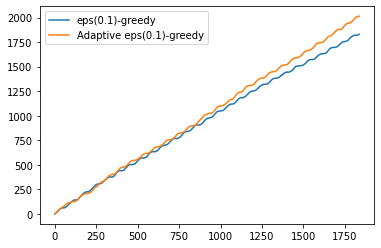

In [377]:
plt.plot(agent1.collected_rewards_cumm,label = 'eps(0.1)-greedy')
plt.plot(agent2.collected_rewards_cumm,label = 'Adaptive eps(0.1)-greedy')
plt.legend()

In [ ]:
  0

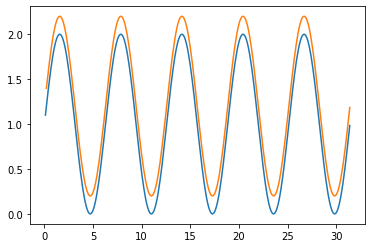

In [340]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.1,10*np.pi,0.1)
y = 1 + np.sin(x)

plt.plot(x,y)

x = np.arange(0.2,10*np.pi,0.1)
y = 1.2 + np.sin(x)

plt.plot(x,y)
plt.show()

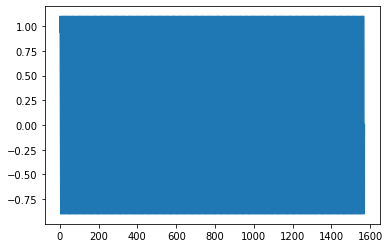

In [80]:
height = 0.1
shift = 1
x = np.arange(shift,500*np.pi,0.1)
y = height + np.sin(x)
plt.plot(x,y)

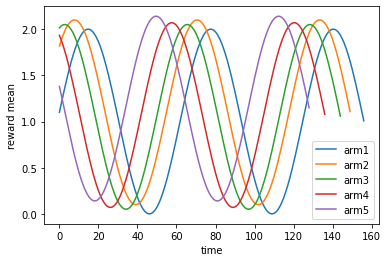

In [381]:
plt.figure()
i = 1
for elem in [['sin' , 0.1 , 1],['sin' , 0.8 , 1.1],['sin' , 1.3 , 1.05],['sin' , 2.1 , 1.07],['sin' , 2.9 , 1.14]]:

  x = np.arange(elem[1],5*np.pi,0.1)
  y = elem[2] + np.sin(x)
  plt.plot(y,label = f'arm{i}')
  i+=1
plt.xlabel('time')
plt.ylabel('reward mean')

plt.legend()
plt.show()